# Importando os dados

In [6]:
 import pandas as pd

In [7]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv")

In [8]:
dados.shape

(7043, 18)

In [9]:
dados.head(15)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
5,0,Nao,Nao,8,Sim,Sim,FibraOptica,Nao,Nao,Sim,Nao,Sim,Sim,Mensalmente,Sim,ChequeDigital,99.65,Sim
6,0,Nao,Sim,22,Sim,Sim,FibraOptica,Nao,Sim,Nao,Nao,Sim,Nao,Mensalmente,Sim,CartaoDeCredito,89.10,Nao
7,0,Nao,Nao,10,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Nao,ChequePapel,29.75,Nao
8,0,Sim,Nao,28,Sim,Sim,FibraOptica,Nao,Nao,Sim,Sim,Sim,Sim,Mensalmente,Sim,ChequeDigital,104.80,Sim
9,0,Nao,Sim,62,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,UmAno,Nao,DebitoEmConta,56.15,Nao


# Diferença de variáveis

A máquina aprende por números, então as variáveis categoricas, precisamos transformar as informações dos valroes categóricos em algo que a máquina possa aprender

In [10]:
# modificanção de forma manuel
traducao_dic = {'Sim' : 1,
                'Nao' : 0}
dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [11]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [12]:
# vendo todas as colunas
pd.set_option('display.max_columns', 39)

In [13]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [14]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

# Conteúdo extra para explicação

Realizar a previsão se determinado e-mail é spam;
Realizar a previsão do preço da gasolina em determinada época;
Realizar a previsão se o(a) paciente irá para a UTI.

R: Classificação, regressão e classificação


Explicação: Tanto a previsão de e-mails em spam quanto a previsão se um(a) paciente irá para a UTI ou não tratam-se de problemas de classificação, pois procuram prever valores categóricos. Já a previsão do preço da gasolina é um problema de regressão, uma vez que busca prever valores numéricos.

Dados desbalanceados são aqueles que possuem muitos registros para uma categoria e poucos para outra. Se não balanceamos esses dados de alguma forma, eles podem acarretar em problemas na construção de modelos e na geração de previsões.

Para verificarmos se a nossa base de dados está desbalanceada, vamos gerar um gráfico que apresenta a distribuição dos valores da nossa variável classificadora "Churn":

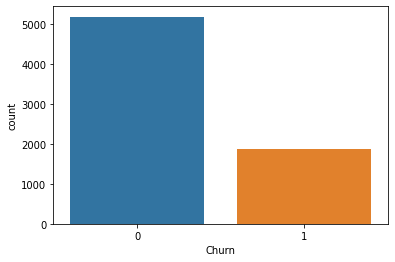

In [15]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

In [16]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 6.7 MB/s 
     |████████████████████████████████| 199 kB 52.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [17]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [18]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [19]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


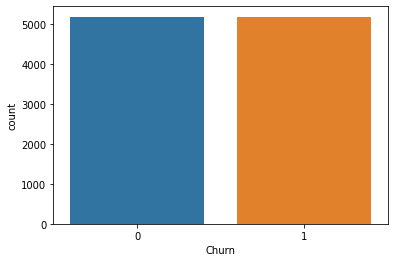

In [20]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

Ao analisarmos a variável classificadora ‘Churn’, podemos notar que há menos clientes contendo Sim - 1 do que Não - 0. Para que o aprendizado do algoritmo não seja afetado pela falta de informações referentes ao Churn de clientes que nos deixaram (Sim), foi necessário aplicar uma técnica de balanceamento.

Nesta situação, foi preferível aplicar o Oversampling por causa das quantidades de informações de clientes que a base como um todo possui. Lembrando que, quanto mais dados para treino, melhor será o aprendizado da máquina. Após a aplicação da técnica SMOTE, houve a verificação se o balanceamento funcionou adequadamente .
Para aprofundar no tema, indico a leitura do artigo:
https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

## Divisão dos dados em treino e teste
Separar o conjunto de dados em treino e teste é uma parte importante para conseguirmos medir o desempenho real de um modelo de machine learning. Essa etapa consiste em dedicar parte do conjunto de dados para treinar o modelo e uma outra parte para teste. Mas qual o motivo de fazer isso?

Imagine que você vai fazer uma prova e o(a) professor(a) passa uma atividade de revisão antes para treinar em casa. Chegando na prova, você percebe que as questões são exatamente iguais à revisão passada pelo(a) professor(a). Como você já sabia as questões, tirou 10! Isso é exatamente o que acontece quando utilizamos os mesmos dados para treinar e testar.

Como os dados são conhecidos pelo modelo, ele simplesmente vai acertar tudo (ou quase tudo) na etapa de teste, pois são os mesmos dados. Para resolver isso, dividimos o conjunto de dados em treino e teste, sendo este último para simular dados nunca antes vistos pelo modelo.

### Dados de treino
Os dados de treino são aqueles utilizados para a criação e treinamento do modelo. Normalmente a maioria dos dados, cerca de 70%, são utilizados para treinamento.

### Dados de teste
Os dados de teste são utilizados para comprovar que o modelo realmente funciona. Eles não são utilizados no treinamento do modelo e normalmente representam 30% da totalidade dos dados.

Além disso, no momento de realizar a separação desses dados é importante que ela seja feita de forma aleatória, para garantirmos que não haverá nenhum padrão no momento de divisão dos dados. Assim, cada amostra terá a mesma probabilidade de ser selecionada.

# KNN
 Algoritmo de machine learning supervisionado. Pode ser usado pra terefas de classificação e regressão

1 - O algoritmo recebe os dados

2 - Ele calcula a distância desse novo dado com os demais ja existente

3 - Ele ordena da menor distância para a maior distância

4 - Ele faz uma contagem de cada classe que aparece dessas distâncias ordenadas

5 - Classificar a partir dos K-vizinhos que a pessoa passar pro algoritmo

6 - Difinir o resultado

In [21]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [22]:
# separando a nossa base de dados em X e Y
# pegando todas as colunas, penos a coluna 'Churn'
X = dados_final.drop('Churn', axis = 1)
# pegando somente a coluna Churn
y = dados_final['Churn']

In [23]:
# deixando todos os valores na mesma escala
# ele pega todos os atributos, subtrai pela media de cada atributo e faz a divisão pelo desvio padrão
from sklearn.preprocessing import StandardScaler

In [24]:
norm = StandardScaler()

In [25]:
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [26]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [27]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

In [28]:
# calculando a distância da maria com o cliente 0 usando a distância euclidiana
# a distância euclidiana é calculada pela raiz quadrada da somatoria da diferença de todos os atributos elevado ao quadrado
import numpy as np

In [29]:
a = Xmaria_normalizado

In [30]:
b = X_normalizado[0]

In [31]:
# 1 - começamos a subtraindo
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166355,  0.34940734,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05586858,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72884488]])

In [32]:
# 2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [33]:
# 3 - soma 
np.sum(np.square(a-b))

91.70603225977928

In [34]:
# 4 - então tiramos a raiz e temos nossa distânci
np.sqrt(91.70603225977928)

9.576326657950807

In [35]:
# implementando o modelo para treino e teste
from sklearn.model_selection import train_test_split 

In [36]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

In [37]:
# Treino e Teste
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# instanciando o modelo e por padrão são 5 k-vizinhos
knn = KNeighborsClassifier(metric = 'euclidean')

In [39]:
# treinando o modelo
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [40]:
# testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [41]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

Teorema de bayes
https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107955

In [42]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [43]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [44]:
np.median(X_treino)

-0.4461759755508453

In [45]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [46]:
# criamos o modelo
# definimos um limite para o algoritmo saber se pode ou não transformar uma variável em binária
# aqui eu usei a mediana dos nossos dados de treinox
# então os valores acima desse valor vira 1 e os valores a baixo em 0, os dados estão padronizados
bnb = BernoulliNB(binarize=-0.44)

In [47]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [48]:
predito_BNb = bnb.predict(X_teste)

In [49]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

Mais modelos para o algoritmo baive bayes: BernoulliNB(), GaussianNB() e MultinomialNB()

# Arvore de Decisão
https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107966

In [50]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [51]:
# instanciando o modelo
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

In [52]:
# treinando o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [53]:
# verificar a importÇancia de cada atributo
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [54]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [55]:
predito_ArvoreDecisao


array([0, 0, 0, ..., 1, 1, 1])

O algoritmo DecisionTreeClassifier() não pode ser utilizado para resolver problemas de regressão. Para problemas de regressão podemos utilizar o algoritmo DecisionTreeRegressor().



# Tipos de métricas

## Matriz de confução
https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107971

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


In [58]:
print(confusion_matrix(y_teste, predito_BNb))

[[1050  519]
 [ 242 1294]]


In [59]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


## Acurácia
ela média o quanto o nosso modelo acertou
A acurácia é utilizada quando queremos saber a performance geral do modelo, isto é, dentre todas as classificações realizadas, quantas foram classificadas corretamente pelo modelo.

 A acurácia é uma boa indicação geral da performance do modelo. Mas, em algumas situações, como em modelos de identificação de fraudes, ela pode ser um pouco enganosa.

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
# modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [63]:
# modelo bernoulli de naive bayes
print(accuracy_score(y_teste, predito_BNb))

0.7549114331723027


In [64]:
# modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338


## Precisão
ela calcula quantos verdadeiros positivos foram classificados de forma correta

A precisão é utilizada quando queremos saber dentre todas as classificações de classe Positivo realizadas pelo modelo, quantas estão corretas.

A precisão pode ser utilizada em situações em que os Falsos Positivos são mais prejudiciais que os Falsos Negativos. Por exemplo, em um modelo de classificação de um bom investimento.

In [65]:
from sklearn.metrics import precision_score

In [66]:
print(precision_score(y_teste, predito_knn))

0.7971552257266543


In [67]:
print(precision_score(y_teste, predito_BNb))

0.7137341423055709


In [68]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7973400886637112


## Recall
Ele calcula o quão bom o modelo está para classificar corretamente um resultado positivo, os verdadeiramente positivos

In [69]:
from sklearn.metrics import recall_score

In [70]:
print(recall_score(y_teste, predito_knn))

0.8391927083333334


In [71]:
print(recall_score(y_teste, predito_BNb))

0.8424479166666666


In [72]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8196614583333334


## Outras métricas
https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107974


In [73]:
print('Modelo KNN:', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes:', precision_score(y_teste, predito_BNb))
print('Modelo Àrvore de Decisão:', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN: 0.7971552257266543
Modelo Bernoulli de Naive Bayes: 0.7137341423055709
Modelo Àrvore de Decisão: 0.7973400886637112
